In [115]:
import pandas as pd
ctg=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\CTG.csv")


In [116]:
ctg.head()

,LB,AC,FM,NSP
0,120,0.000,0.0,2
1,132,0.006,0.0,1
2,133,0.003,0.0,1
3,134,0.003,0.0,1
4,132,0.007,0.0,1


In [117]:
from sklearn.model_selection import train_test_split
ctg_train,ctg_test = train_test_split(ctg, test_size=.2,random_state=789)
#-------------------------------------------------
# over sampling

# df2=ctg_train[ctg_train.NSP==2]
# df3=ctg_train[ctg_train.NSP==3]
# ctg_train=pd.concat([ctg_train,df2,df2,df3,df3,df3,])

#--------------------------------------------------
ctg_train_x= ctg_train.iloc[:,0:-1]
ctg_train_y= ctg_train.iloc[:,-1] # target colum last col

ctg_test_x= ctg_test.iloc[:,0:-1]
ctg_test_y= ctg_test.iloc[:,-1]

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [119]:
knn.fit(ctg_train_x,ctg_train_y)

KNeighborsClassifier()

In [120]:
pred_knn=knn.predict(ctg_test_x)

In [121]:
from sklearn.metrics import confusion_matrix,classification_report

In [122]:
tab1=confusion_matrix(ctg_test_y,pred_knn)
tab1#before sampling

array([[305,  13,  16],
       [ 34,  21,   2],
       [ 17,   9,   9]], dtype=int64)

In [123]:
#after over sampling 

# tab1=confusion_matrix(ctg_test_y,pred_knn)
# tab1

#      ([[299,  24,  11],
#        [ 28,  27,   2],
#        [ 15,   8,  12]]

In [124]:
tab1.diagonal().sum()/tab1.sum()

0.7863849765258216

In [125]:
print(classification_report(ctg_test_y,pred_knn))

              precision    recall  f1-score   support

           1       0.86      0.91      0.88       334
           2       0.49      0.37      0.42        57
           3       0.33      0.26      0.29        35

    accuracy                           0.79       426
   macro avg       0.56      0.51      0.53       426
weighted avg       0.76      0.79      0.77       426



In [126]:
#code for the graph
acc=[]
for k in range(1,101): # running 100 times,
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(ctg_train_x,ctg_train_y)
    pred_knn=knn.predict(ctg_test_x)
    tab1=confusion_matrix(ctg_test_y,pred_knn)
    acc.append(tab1.diagonal().sum()/tab1.sum())
#     print(k)
#     print("***")
    
# K will increse it will be more stable 

In [127]:
import matplotlib.pyplot as plt

In [128]:
l1=list(range(1,101))

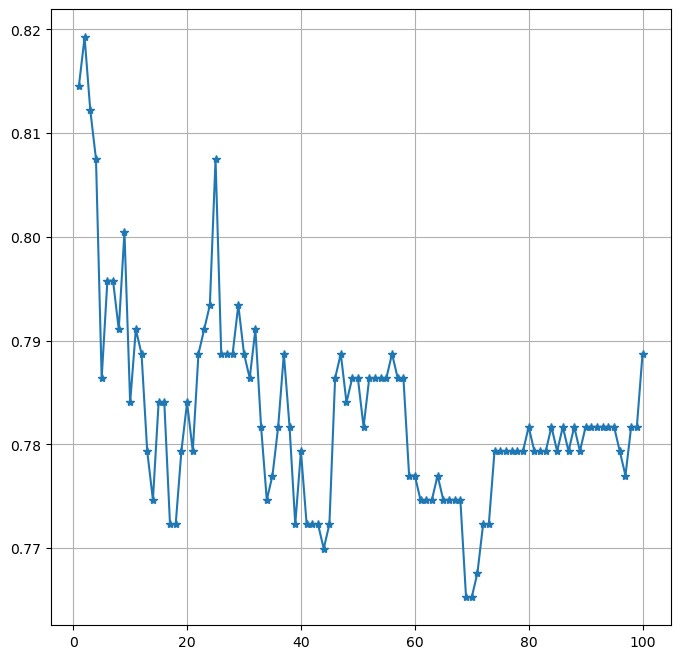

In [129]:
plt.figure(figsize=(8,8))
plt.plot(l1,acc,marker="*")
plt.grid()

# AdultKNN_Data_Set

### Dest Tree ,Log Reg, Random Forest, Naive, Knn 

In [140]:
import pandas as pd

In [141]:
aknn=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\adultKNN.csv")
aknn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [142]:
aknn.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [143]:
import numpy as np
aknn=aknn.replace({'?':np.nan})#-----------------replace ? into nan

In [144]:
aknn.isnull().sum() [aknn.isnull().sum() > 0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [145]:
aknn.workclass.fillna('Private',inplace=True) #we have to fill nan with top names coming by putting value count
aknn.occupation.fillna('other',inplace=True)
aknn['native-country'].fillna('United-States',inplace=True)

In [146]:
aknn.isnull().sum()[aknn.isnull().sum()>0]

Series([], dtype: int64)

In [147]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace=True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace=True)

In [148]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [149]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

#over Sampling

# df1=aknn_train[aknn_train.income==1]
# aknn_train=pd.concat([aknn_train,df1])

aknn_train_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[:,-1] 

aknn_test_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[:,-1]

# LogisticRegression

In [152]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [154]:
logreg.fit(aknn_train_x,aknn_train_y)

LogisticRegression()

In [155]:
pred_logreg=logreg.predict(aknn_test_x)

In [156]:
from sklearn.metrics import confusion_matrix,classification_report

In [157]:
tab_aknn=confusion_matrix(aknn_test_y,pred_logreg)

In [158]:
tab_aknn
#befor over sampling 
#        [28226,  1512],
#        [ 6642,  2693]

# after Sampling
#        [26188,  3550],
#        [11446,  7224]

array([[28225,  1513],
       [ 6650,  2685]], dtype=int64)

In [159]:
print(classification_report(aknn_test_y,pred_logreg))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     29738
           1       0.64      0.29      0.40      9335

    accuracy                           0.79     39073
   macro avg       0.72      0.62      0.64     39073
weighted avg       0.77      0.79      0.76     39073



In [160]:
# tab_aknn=pd.DataFrame(tab_aknn)
# tab_aknn.columns=["<=50",">50"]
# tab_aknn.index=["<=50",">50"]
# tab_aknn

# Decision Tree

In [161]:
import pandas as pd
aknn=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\adultKNN.csv")

In [162]:
aknn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [163]:
import numpy as np
aknn=aknn.replace({'?':np.nan})#-----------------replace ? into nan

In [164]:
aknn.isnull().sum() [aknn.isnull().sum() > 0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [165]:
aknn.workclass.fillna('Private',inplace=True) #we have to fill nan with top names coming by putting value count
aknn.occupation.fillna('other',inplace=True)
aknn['native-country'].fillna('United-States',inplace=True)

In [166]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace=True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace=True)

In [167]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [168]:
# aknn=aknn.loc[:,l1]

In [169]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

#over Sampling

# df1=aknn_train[aknn_train.income==1]
# aknn_train=pd.concat([aknn_train,df1])

aknn_train_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[:,-1] 

aknn_test_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[:,-1]

# Model in DT

In [170]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight="balanced",max_depth=7,min_samples_split=25)#
dt.fit(aknn_train_x,aknn_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=25)

In [171]:
pred_dt=dt.predict(aknn_test_x)

In [172]:
from sklearn.metrics import confusion_matrix,classification_report

In [174]:
tab_dt=confusion_matrix(aknn_test_y,pred_dt)
tab_dt

#befor over sampling 
#        [28226,  1512],
#        [ 6642,  2693]


array([[23213,  6525],
       [ 1175,  8160]], dtype=int64)

In [175]:
print(classification_report(aknn_test_y,pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     29738
           1       0.56      0.87      0.68      9335

    accuracy                           0.80     39073
   macro avg       0.75      0.83      0.77     39073
weighted avg       0.86      0.80      0.82     39073



In [176]:
# #freature IMP
# feat_imp_dt = pd.DataFrame()
# feat_imp_dt['features'] = aknn_train_x.columns
# feat_imp_dt['imp']=dt.feature_importances_
# feat_imp_dt=feat_imp_dt.sort_values('imp',ascending=False)
# feat_imp_dt

In [177]:
# l1 = list(feat_imp_dt.features[0:1])
# l1.append('income')
# l1

# Random Forest

In [178]:
import pandas as pd
aknn=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\adultKNN.csv")

In [179]:
aknn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [180]:
import numpy as np
aknn=aknn.replace({'?':np.nan})#-----------------replace ? into nan

In [181]:
aknn.isnull().sum() [aknn.isnull().sum() > 0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [182]:
aknn.workclass.fillna('Private',inplace=True) #we have to fill nan with top names coming by putting value count
aknn.occupation.fillna('other',inplace=True)
aknn['native-country'].fillna('United-States',inplace=True)

In [183]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace=True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace=True)

In [184]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [197]:
 aknn=aknn.loc[:,l1]

In [198]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

#over Sampling

# df1=aknn_train[aknn_train.income==1]
# aknn_train=pd.concat([aknn_train,df1])

aknn_train_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[:,-1] 

aknn_test_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[:,-1]

In [199]:
#random forest

In [200]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(aknn_test_x,aknn_test_y)

RandomForestClassifier()

In [201]:
# predction


In [202]:
pred_rfc=rfc.predict(aknn_test_x)

In [203]:
from sklearn.metrics import confusion_matrix,classification_report

In [204]:
#after feature imp

tab_rfc=confusion_matrix(aknn_test_y,pred_rfc)
tab_rfc

array([[29114,   624],
       [ 1078,  8257]], dtype=int64)

In [205]:
print(classification_report(aknn_test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29738
           1       0.93      0.88      0.91      9335

    accuracy                           0.96     39073
   macro avg       0.95      0.93      0.94     39073
weighted avg       0.96      0.96      0.96     39073



In [194]:
#freature IMP
feat_imp_rfc = pd.DataFrame()
feat_imp_rfc['features'] = aknn_train_x.columns
feat_imp_rfc['imp']=dt.feature_importances_
feat_imp_rfc=feat_imp_rfc.sort_values('imp',ascending=False)
feat_imp_rfc

,features,imp
7,relationship,5.537113e-01
10,capital-gain,1.594550e-01
4,educational-num,1.342040e-01
0,age,5.172881e-02
12,hours-per-week,3.780749e-02
3,education,2.958318e-02
11,capital-loss,2.792785e-02
6,occupation,2.627310e-03
8,race,9.611144e-04
2,fnlwgt,9.380126e-04


In [196]:
l1 = list(feat_imp_rfc.features[0:9])# select those record u want
l1.append('income')
l1

['relationship',
 'capital-gain',
 'educational-num',
 'age',
 'hours-per-week',
 'education',
 'capital-loss',
 'occupation',
 'race',
 'income']

# Naive Bayes

In [209]:
import pandas as pd
aknn=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\adultKNN.csv")

In [210]:
aknn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [211]:
import numpy as np
aknn=aknn.replace({'?':np.nan})#-----------------replace ? into nan

In [212]:
aknn.isnull().sum() [aknn.isnull().sum() > 0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [213]:
aknn.workclass.fillna('Private',inplace=True) #we have to fill nan with top names coming by putting value count
aknn.occupation.fillna('other',inplace=True)
aknn['native-country'].fillna('United-States',inplace=True)

In [214]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace=True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace=True)

In [215]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [216]:
# sampling :--

from sklearn.model_selection import train_test_split
aknn_train , aknn_test  =train_test_split(aknn , test_size= .2 , random_state=123)

#over Sampling

# df1=aknn_train[aknn_train.income==1]
# aknn_train=pd.concat([aknn_train,df1])

aknn_train_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_train_y= aknn_train.iloc[:,-1] 

aknn_test_x= aknn_train.iloc[:,0:-1] # it will take from starting to y
aknn_test_y= aknn_train.iloc[:,-1]

In [217]:
#model naive

In [218]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(aknn_train_x,aknn_train_y)


MultinomialNB()

In [219]:
pred_nb=nb.predict(aknn_test_x)

In [220]:
#confussion matrix

In [221]:
from sklearn.metrics import confusion_matrix,classification_report

In [222]:
tab_nb=confusion_matrix(aknn_test_y,pred_nb)
tab_nb

array([[28433,  1305],
       [ 7135,  2200]], dtype=int64)

In [223]:
print(classification_report(aknn_test_y,pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     29738
           1       0.63      0.24      0.34      9335

    accuracy                           0.78     39073
   macro avg       0.71      0.60      0.61     39073
weighted avg       0.76      0.78      0.74     39073



# Knn

In [224]:
import pandas as pd
aknn=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\adultKNN.csv")

In [225]:
aknn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [226]:
import numpy as np
aknn=aknn.replace({'?':np.nan})#-----------------replace ? into nan

In [227]:
aknn.isnull().sum() [aknn.isnull().sum() > 0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [228]:
aknn.workclass.fillna('Private',inplace=True) #we have to fill nan with top names coming by putting value count
aknn.occupation.fillna('other',inplace=True)
aknn['native-country'].fillna('United-States',inplace=True)

In [229]:
# replace all objects with numeric values:-   
aknn.education.replace({'11th':7, 'HS-grad':9, 'Assoc-acdm':11, 'Some-college':10, '10th':6,
       'Prof-school':14, '7th-8th':4, 'Bachelors':13, 'Masters':15, 'Doctorate':16,
       '5th-6th':3, 'Assoc-voc':12, '9th':5, '12th':8, '1st-4th':2, 'Preschool':1} ,inplace = True)

aknn.gender.replace({'Male':1, 'Female':0} ,inplace=True)
aknn.income.replace({'<=50K':0, '>50K':1} ,inplace=True)

In [230]:
# replace with le fit:-

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

aknn.workclass = le.fit_transform(aknn.workclass)
aknn['marital-status'] = le.fit_transform(aknn['marital-status'])
aknn.occupation = le.fit_transform(aknn.occupation)
aknn.relationship = le.fit_transform(aknn.relationship)
aknn.race = le.fit_transform(aknn.race)
aknn['native-country']= le.fit_transform(aknn['native-country'])

In [337]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [338]:
knn.fit(aknn_train_x,aknn_train_y)

KNeighborsClassifier()

In [339]:
pred_knn=knn.predict(aknn_test_x)

In [340]:
from sklearn.metrics import confusion_matrix,classification_report

In [341]:
tab_knn=confusion_matrix(aknn_test_y,pred_knn)
tab_knn

array([[28318,  1420],
       [ 4985,  4350]], dtype=int64)

In [342]:
tab_knn.diagonal().sum()/tab_knn.sum()

0.8360760627543317

In [343]:
print(classification_report(aknn_test_y,pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     29738
           1       0.75      0.47      0.58      9335

    accuracy                           0.84     39073
   macro avg       0.80      0.71      0.74     39073
weighted avg       0.83      0.84      0.82     39073



In [344]:
tab_knn=pd.DataFrame(tab_aknn)
tab_knn.columns=["<=50",">50"]
tab_knn.index=["<=50",">50"]
tab_knn

,<=50,>50
<=50,28225,1513
>50,6650,2685


In [346]:
#code for the graph
acc=[]
for k in range(1,51): # running 100 times,
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(aknn_train_x,aknn_train_y)
    pred_knn=knn.predict(aknn_test_x)
    tab_knn=confusion_matrix(aknn_test_y,pred_knn)
    acc.append(tab_knn.diagonal().sum()/tab_knn.sum())

In [347]:
import matplotlib.pyplot as plt

In [348]:
l1=list(range(1,51))

Text(0, 0.5, 'Accuracy')

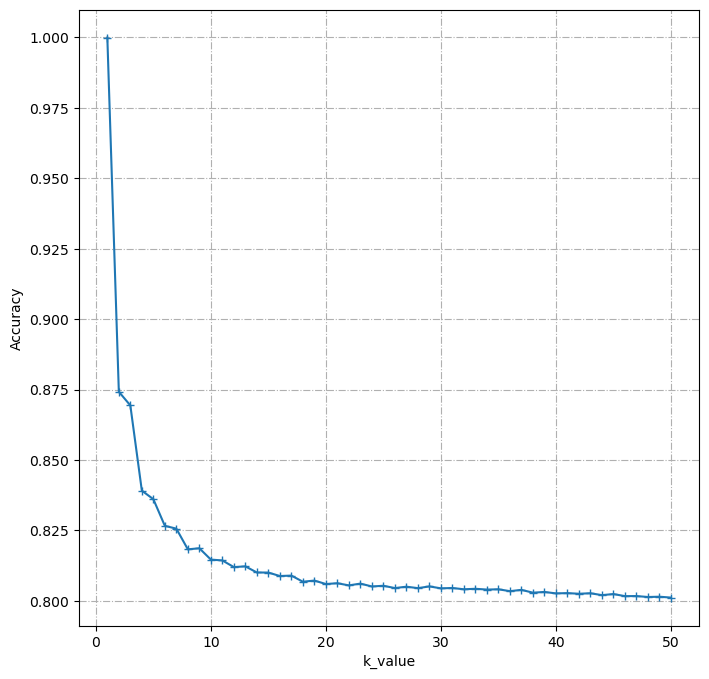

In [349]:
plt.figure(figsize=(8,8))
plt.plot(l1,acc,marker="+")
plt.grid(linestyle="-.")
plt.xlabel('k_value')
plt.ylabel('Accuracy')